<b>NAME :- ARUN M</b>
<br><i>Register No  : 23122110</i>
<br><i>Class : 3MSc DS B</i>

<h1><b>Loading the Dataset</b><h1>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
df=pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,price
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,2.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,2.0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,2.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,2.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,2.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,2,0.0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,2,0.0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,2,0.0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,2,0.0


In [2]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
price                  65
dtype: int64

<h1><b>Data Cleaning</b></h1>
<b>Dealing with Missing Values</b>

In [3]:
mean=df['total_bedrooms'].median
df['total_bedrooms']=df['total_bedrooms'].fillna(mean)

mode=df['price'].mode
df['price']=df['price'].fillna(mode)

df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
price                 0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  object 
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  int64  
 9   price               20640 non-null  object 
dtypes: float64(3), int64(5), object(2)
memory usage: 1.6+ MB


<b>Scatter Plot Of Every Columns<b>

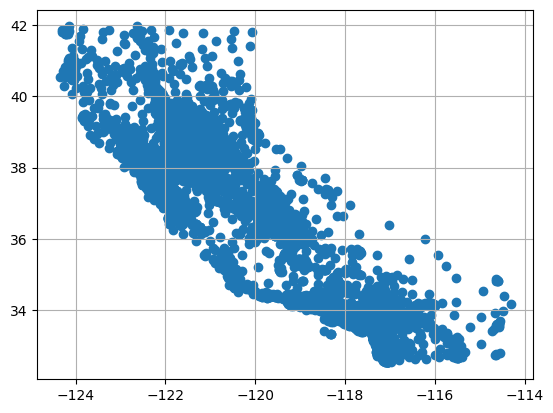

In [5]:
import numpy as np
import matplotlib.pyplot as plt

X=np.array(df)
X=X[:,0:8]
fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
ocean_proximity,20640.0,1.464729,0.854226,0.0000,1.0000,1.0000,2.00000,4.0000


In [7]:
features = ['longitude', 'latitude', 'median_income']
select_df = df[features]
select_df.columns

Index(['longitude', 'latitude', 'median_income'], dtype='object')

<h2><b>Using Standardization<b><h2>

In [8]:
from sklearn.preprocessing import StandardScaler 
X = StandardScaler().fit_transform(select_df)
X[:5]

array([[-1.32783522,  1.05254828,  2.34476576],
       [-1.32284391,  1.04318455,  2.33223796],
       [-1.33282653,  1.03850269,  1.7826994 ],
       [-1.33781784,  1.03850269,  0.93296751],
       [-1.33781784,  1.03850269, -0.012881  ]])

In [9]:
kmeans = KMeans(n_clusters=6) # number of clusters must be specified
model = kmeans.fit(X)
model

C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6)

In [10]:
centers = model.cluster_centers_
centers[:5]

array([[-1.16077604,  1.27363315, -0.55826897],
       [ 0.77019311, -0.8280084 ,  0.79189865],
       [-1.1910302 ,  0.97428523,  0.84638603],
       [ 0.87154969, -0.84932312, -0.55235333],
       [ 0.15349552, -0.33070327,  3.53208931]])

In [11]:
def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas data frame for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

In [12]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [13]:

P = pd_centers(features, centers)
P

,longitude,latitude,median_income,prediction
0,-1.160776,1.273633,-0.558269,0
1,0.770193,-0.828008,0.791899,1
2,-1.191030,0.974285,0.846386,2
3,0.871550,-0.849323,-0.552353,3
4,0.153496,-0.330703,3.532089,4
5,-0.080120,0.229243,-0.656650,5


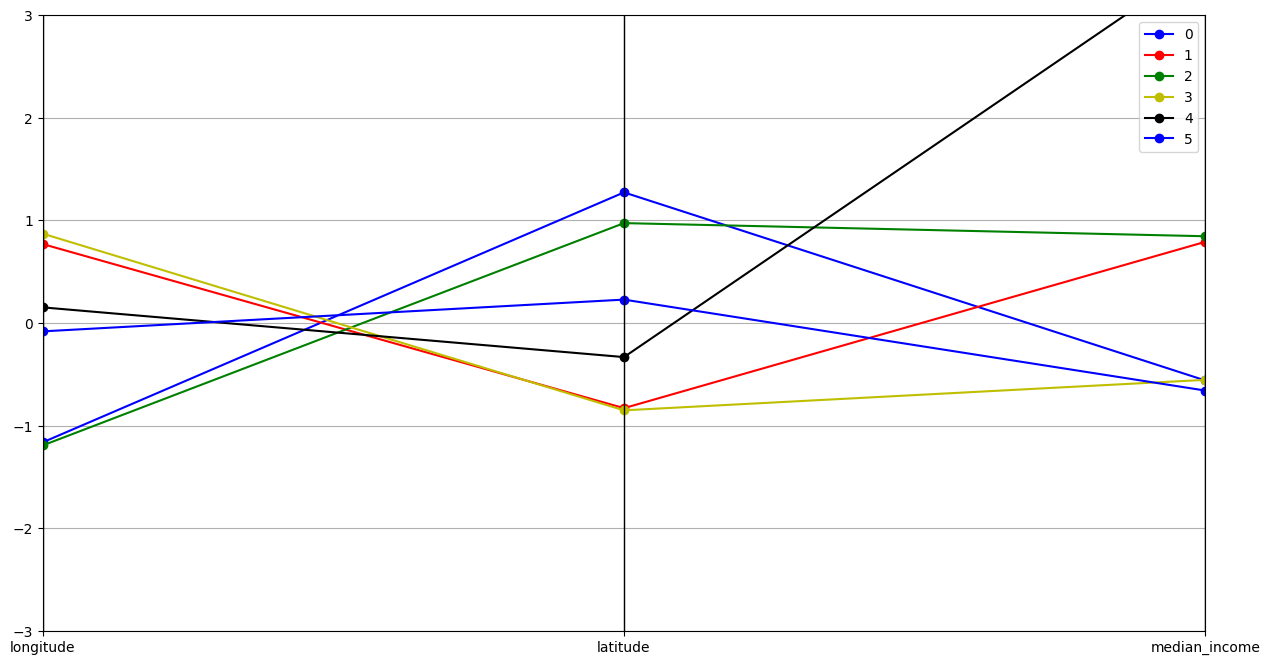

In [14]:
parallel_plot(P)

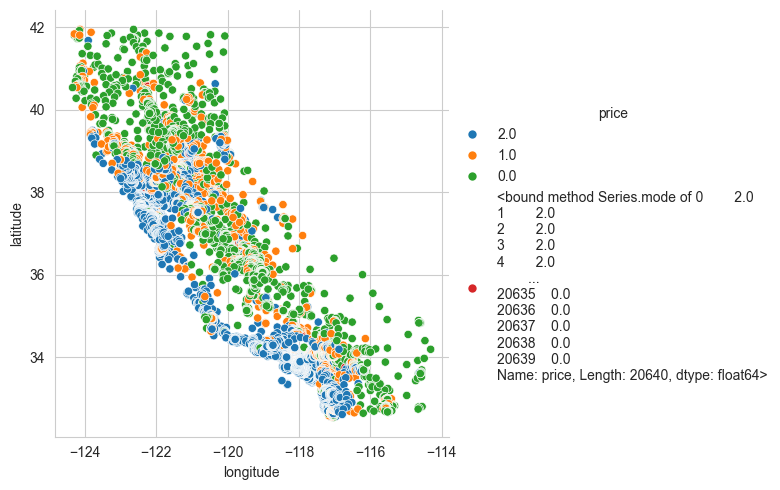

In [15]:
import seaborn as sns
sns.set_style('whitegrid')
sns.relplot(x='longitude', y='latitude', hue='price', data=df, kind='scatter');

<p>By examining the scatter plot, you can visually identify areas with higher housing prices (represented by warmer colors) and areas with lower housing prices (represented by cooler colors).
Clusters of similarly colored points may indicate areas with similar price ranges or areas where housing prices exhibit spatial patterns.
Patterns such as gradients or clusters can be indicative of geographic trends in housing prices across the dataset.<p>

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import cluster, metrics
import numpy as np


# Transpose X if needed
X = X.transpose()


y = X[:, 1] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=70)

# Initialize and fit the KMeans model
k_means = cluster.KMeans(n_clusters=2, random_state=70)
k_means.fit(X_train)

# Print the labels assigned by KMeans to the training data
print('KMeans Training Labels:', k_means.labels_[:])
print('True Training Labels:', y_train[:])

# Predict the labels for the test data
y_pred = k_means.predict(X_test)


# which compares the similarity of two assignments.
adjusted_rand_score = metrics.adjusted_rand_score(y_test, y_pred)
print('Adjusted Rand Index:', adjusted_rand_score)

# If you still want to print labels for the test data:
print('KMeans Test Labels:', y_pred[:])
print('True Test Labels:', y_test[:])


KMeans Training Labels: [1 0]
True Training Labels: [-1.32284391  2.33223796]
Adjusted Rand Index: 1.0
KMeans Test Labels: [0]
True Test Labels: [1.04318455]


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [17]:
from sklearn.model_selection import train_test_split
from sklearn import cluster, metrics
import numpy as np

X = X.transpose()


y = X[:, 1]  # Extract the second column for y, assuming it is the label

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=70)

# Initialize and fit the KMeans model
k_means = cluster.KMeans(n_clusters=3, random_state=70)
k_means.fit(X_train)

# Print the labels assigned by KMeans to the training data
print('KMeans Training Labels:', k_means.labels_[:])
print('True Training Labels:', y_train[:])

# Predict the labels for the test data
y_pred = k_means.predict(X_test)


# which compares the similarity of two assignments.
adjusted_rand_score = metrics.adjusted_rand_score(y_test, y_pred)
print('Adjusted Rand Index:', adjusted_rand_score)

# If you still want to print labels for the test data:
print('KMeans Test Labels:', y_pred[:])
print('True Test Labels:', y_test[:])


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans Training Labels: [0 0 1 ... 0 2 1]
True Training Labels: [ 1.06191201  0.77631821 -0.49714926 ...  1.38496075 -1.22283844
 -0.82487986]
Adjusted Rand Index: 0.007250121268957028
KMeans Test Labels: [2 1 1 ... 1 1 1]
True Test Labels: [-0.69378762 -0.84360732 -1.06365501 ... -1.36797628 -1.42884054
 -0.76869747]


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [19]:
from sklearn.model_selection import train_test_split
from sklearn import cluster, metrics
import numpy as np
X = X.transpose()
y = X[:, 1]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=70)

# Initialize and fit the KMeans model
k_means = cluster.KMeans(n_clusters=4, random_state=70)
k_means.fit(X_train)


print('KMeans Training Labels:', k_means.labels_[:])
print('True Training Labels:', y_train[:])


y_pred = k_means.predict(X_test)


adjusted_rand_score = metrics.adjusted_rand_score(y_test, y_pred)
print('Adjusted Rand Index:', adjusted_rand_score)


print('KMeans Test Labels:', y_pred[:])
print('True Test Labels:', y_test[:])


KMeans Training Labels: [2 2 1 ... 2 3 1]
True Training Labels: [ 1.06191201  0.77631821 -0.49714926 ...  1.38496075 -1.22283844
 -0.82487986]
Adjusted Rand Index: 0.008704635257001847
KMeans Test Labels: [3 1 1 ... 1 1 3]
True Test Labels: [-0.69378762 -0.84360732 -1.06365501 ... -1.36797628 -1.42884054
 -0.76869747]


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn import cluster, metrics
import numpy as np
X = X.transpose()
y = X[:, 1]  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=70)

# Initialize and fit the KMeans model
k_means = cluster.KMeans(n_clusters=5, random_state=70)
k_means.fit(X_train)


print('KMeans Training Labels:', k_means.labels_[:])
print('True Training Labels:', y_train[:])


y_pred = k_means.predict(X_test)


adjusted_rand_score = metrics.adjusted_rand_score(y_test, y_pred)
print('Adjusted Rand Index:', adjusted_rand_score)


print('KMeans Test Labels:', y_pred[:])
print('True Test Labels:', y_test[:])


KMeans Training Labels: [1 1 0 ... 1 4 0]
True Training Labels: [ 1.06191201  0.77631821 -0.49714926 ...  1.38496075 -1.22283844
 -0.82487986]
Adjusted Rand Index: 0.008873798148844508
KMeans Test Labels: [2 0 2 ... 0 0 2]
True Test Labels: [-0.69378762 -0.84360732 -1.06365501 ... -1.36797628 -1.42884054
 -0.76869747]


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\arunp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

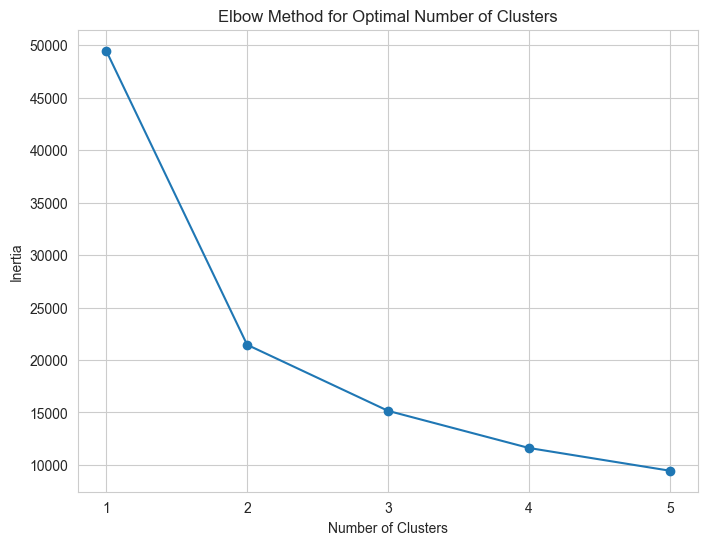

In [22]:
def calculate_inertia(X, max_clusters=5):
    inertia = []
    for n_clusters in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=70)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    return inertia
max_clusters = 5
inertia = calculate_inertia(X_train, max_clusters)
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

<p>The Elbow Method helps to determine the optimal number of clusters by identifying the point where the inertia starts to decrease more slowly (forming an "elbow" shape).The plot shows how inertia changes with the number of clusters.The elbow point (where the plot bends) suggests the optimal number of clusters. Beyond this point, adding more clusters yields diminishing returns in terms of reducing inertia.<p>